In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [52]:
df = pd.read_csv("national_MRA_clean.csv")
df

,date,location,vectorid,price,product,unit_quantity,unit,category
0,1995-01-01,Canada,v735165,10.17,Round steak,1.0,kilogram,Protein
1,1995-01-01,Canada,v735176,11.25,Sirloin steak,1.0,kilogram,Protein
2,1995-01-01,Canada,v735187,12.08,Prime rib roast,1.0,kilogram,Protein
3,1995-01-01,Canada,v735198,7.23,Blade roast,1.0,kilogram,Protein
4,1995-01-01,Canada,v735209,7.12,Stewing beef,1.0,kilogram,Protein
...,...,...,...,...,...,...,...,...
15649,2022-02-01,Canada,v735202,7.10,"Coffee, instant",200.0,grams,Beverages
15650,2022-02-01,Canada,v735203,4.49,Tea,72.0,bags,Beverages
15651,2022-02-01,Canada,v735204,4.45,Cooking or salad oil,1.0,litre,Oils
15652,2022-02-01,Canada,v735205,1.28,"Soup, canned",284.0,millilitres,Other_foods


In [53]:
from datetime import date

df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())

In [54]:
df.describe()

,price,unit_quantity,date_ordinal
count,15654.000000,15654.000000,15654.000000
mean,4.439426,148.777294,733156.622014
std,4.614685,226.969813,2850.922756
min,0.580000,1.000000,728294.000000
25%,1.750000,1.000000,730667.000000
50%,2.910000,1.360000,733133.000000
75%,4.890000,284.000000,735630.000000
max,44.820000,796.000000,738187.000000


In [55]:
cdf = df[['date','price','product','category', 'date_ordinal']]
cdf

,date,price,product,category,date_ordinal
0,1995-01-01,10.17,Round steak,Protein,728294
1,1995-01-01,11.25,Sirloin steak,Protein,728294
2,1995-01-01,12.08,Prime rib roast,Protein,728294
3,1995-01-01,7.23,Blade roast,Protein,728294
4,1995-01-01,7.12,Stewing beef,Protein,728294
...,...,...,...,...,...
15649,2022-02-01,7.10,"Coffee, instant",Beverages,738187
15650,2022-02-01,4.49,Tea,Beverages,738187
15651,2022-02-01,4.45,Cooking or salad oil,Oils,738187
15652,2022-02-01,1.28,"Soup, canned",Other_foods,738187


In [56]:
cdf.dtypes

date             object
price           float64
product          object
category         object
date_ordinal      int64
dtype: object

In [57]:
cdf['date'] = pd.to_datetime(df['date'])
cdf['product'].astype(str)
cdf['category'].astype(str)

cdf.dtypes

/var/folders/_l/rvfsqjvn4fl7npqhjz_rd08h0000gn/T/ipykernel_3130/458416524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['date'] = pd.to_datetime(df['date'])


date            datetime64[ns]
price                  float64
product                 object
category                object
date_ordinal             int64
dtype: object

In [58]:
cdf.head(52)

,date,price,product,category,date_ordinal
0,1995-01-01,10.17,Round steak,Protein,728294
1,1995-01-01,11.25,Sirloin steak,Protein,728294
2,1995-01-01,12.08,Prime rib roast,Protein,728294
3,1995-01-01,7.23,Blade roast,Protein,728294
4,1995-01-01,7.12,Stewing beef,Protein,728294
5,1995-01-01,3.73,Ground beef,Protein,728294
6,1995-01-01,8.36,Pork chops,Protein,728294
7,1995-01-01,4.90,Butt roast,Protein,728294
8,1995-01-01,3.72,Chicken,Protein,728294
9,1995-01-01,3.00,Bacon,Protein,728294


In [59]:
grouped = cdf.groupby(['category'])

protein = grouped.get_group("Protein")
beverages = grouped.get_group("Beverages")
dairy = grouped.get_group("Dairy")
grains = grouped.get_group("Grains")
veg_fruits = grouped.get_group("Veg_Fruits")
frozen = grouped.get_group("Frozen")
plant_based = grouped.get_group("Plant_based")
others = grouped.get_group("Other_foods")


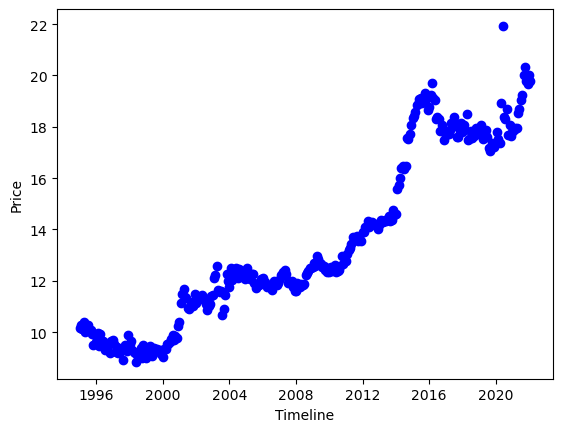

In [60]:
round_steak = cdf[(cdf['product'] == 'Round steak')]
plt.scatter(round_steak.date, round_steak.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.show()

In [61]:
round_steak

,date,price,product,category,date_ordinal
0,1995-01-01,10.17,Round steak,Protein,728294
50,1995-02-01,10.29,Round steak,Protein,728325
100,1995-03-01,10.12,Round steak,Protein,728353
150,1995-04-01,10.38,Round steak,Protein,728384
200,1995-05-01,10.00,Round steak,Protein,728414
...,...,...,...,...,...
15439,2021-10-01,20.34,Round steak,Protein,738064
15482,2021-11-01,19.77,Round steak,Protein,738095
15525,2021-12-01,19.66,Round steak,Protein,738125
15568,2022-01-01,20.03,Round steak,Protein,738156


In [62]:
msk = np.random.rand(len(round_steak)) < 0.8
train = round_steak[msk]
test = round_steak[~msk]

In [63]:
train

,date,price,product,category,date_ordinal
0,1995-01-01,10.17,Round steak,Protein,728294
50,1995-02-01,10.29,Round steak,Protein,728325
200,1995-05-01,10.00,Round steak,Protein,728414
350,1995-08-01,10.07,Round steak,Protein,728506
400,1995-09-01,10.08,Round steak,Protein,728537
...,...,...,...,...,...
15439,2021-10-01,20.34,Round steak,Protein,738064
15482,2021-11-01,19.77,Round steak,Protein,738095
15525,2021-12-01,19.66,Round steak,Protein,738125
15568,2022-01-01,20.03,Round steak,Protein,738156


In [64]:
test

,date,price,product,category,date_ordinal
100,1995-03-01,10.12,Round steak,Protein,728353
150,1995-04-01,10.38,Round steak,Protein,728384
250,1995-06-01,10.19,Round steak,Protein,728445
300,1995-07-01,10.26,Round steak,Protein,728475
550,1995-12-01,9.88,Round steak,Protein,728628
...,...,...,...,...,...
14880,2020-09-01,18.71,Round steak,Protein,737669
15009,2020-12-01,17.66,Round steak,Protein,737760
15138,2021-03-01,17.97,Round steak,Protein,737850
15267,2021-06-01,18.71,Round steak,Protein,737942


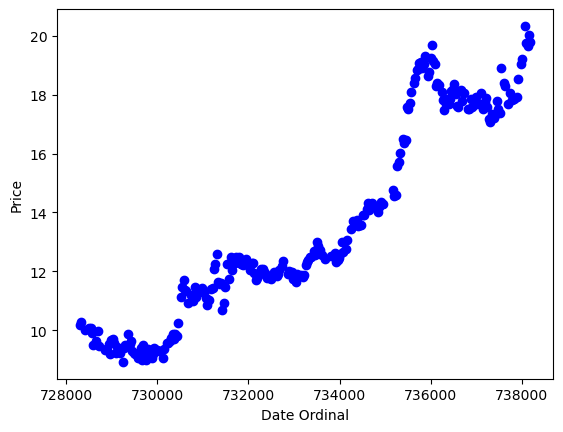

In [65]:
# Train data distribution

plt.scatter(train.date_ordinal, train.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.show()

In [66]:
# Modeling

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['date_ordinal']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0011185]]
Intercept:  [-806.61705277]


Text(0, 0.5, 'Price')

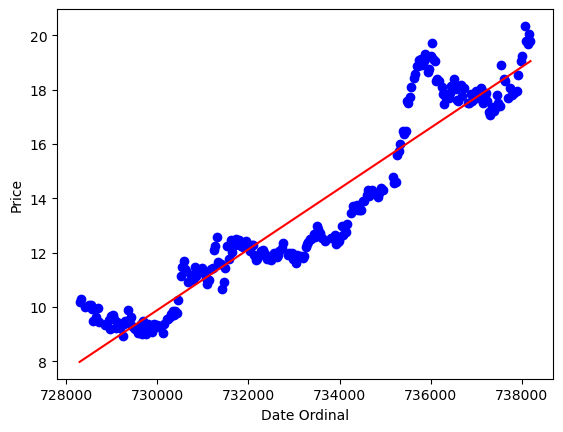

In [67]:
# Plot outputs 

plt.scatter(train.date_ordinal, train.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")

In [68]:
test_x = np.asanyarray(test[['date_ordinal']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 1.06
Residual sum of squares (MSE): 1.62
R2-score: 0.84
